In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [3]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

### All features in this dataset

* <b>There are 25 variables:
* <b>
* <b>ID:</b> ID of each client
* <b>LIMIT_BAL:</b> Amount of given credit in NT dollars (includes individual and family/supplementary credit
* <b>SEX:</b> Gender (1=male, 2=female)
* <b>EDUCATION:</b> (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* <b>MARRIAGE:</b> Marital status (1=married, 2=single, 3=others)
* <b>AGE:</b> Age in years
* <b>PAY_0: </b> Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* <b>PAY_2: </b> Repayment status in August, 2005 (scale same as above)
* <b>PAY_3: </b> Repayment status in July, 2005 (scale same as above)
* <b>PAY_4: </b> Repayment status in June, 2005 (scale same as above)
* <b>PAY_5: </b> Repayment status in May, 2005 (scale same as above)
* <b>PAY_6: </b> Repayment status in April, 2005 (scale same as above)
* <b>BILL_AMT1: </b>Amount of bill statement in September, 2005 (NT dollar)
* <b>BILL_AMT2: </b>Amount of bill statement in August, 2005 (NT dollar)
* <b>BILL_AMT3: </b>Amount of bill statement in July, 2005 (NT dollar)
* <b>BILL_AMT4: </b>Amount of bill statement in June, 2005 (NT dollar)
* <b>BILL_AMT5: </b>Amount of bill statement in May, 2005 (NT dollar)
* <b>BILL_AMT6: </b>Amount of bill statement in April, 2005 (NT dollar)
* <b>PAY_AMT1: </b>Amount of previous payment in September, 2005 (NT dollar)
* <b>PAY_AMT2: </b>Amount of previous payment in August, 2005 (NT dollar)
* <b>PAY_AMT3: </b>Amount of previous payment in July, 2005 (NT dollar)
* <b>PAY_AMT4: </b>Amount of previous payment in June, 2005 (NT dollar)
* <b>PAY_AMT5: </b>Amount of previous payment in May, 2005 (NT dollar)
* <b>PAY_AMT6: </b>Amount of previous payment in April, 2005 (NT dollar)
* <b>default.payment.next.month:</b>Default payment (1=yes, 0=no)

### Data cleaning 

In [4]:
#We are deleting id column as it was not usefull here 
df.drop('ID',axis=1,inplace=True)
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 24 columns]

In [5]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [6]:
# We are just changing names of columns for our convinence 
# PAY_0 to PAY_1
# default.payment.next.month to default 
df.rename(columns={"PAY_0":"PAY_1","default.payment.next.month":"Default"},inplace=True)

In [7]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [8]:
df.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
Default        int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [10]:
df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_1         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6       Default  
count   30000.000000  30000.000000  
mean     5215.502567      0.221200  
std     17777.465775      0.415062  
min         0.000000      0.000000  
25%       117.750000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000  

[8 rows x 24 columns]

# EDA :

In [11]:
#### Missing values 
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

## Graph based analysis :

#### LIMIT_BAL

In [12]:
df["LIMIT_BAL"].value_counts()

50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
             ... 
730000.0        2
1000000.0       1
327680.0        1
760000.0        1
690000.0        1
Name: LIMIT_BAL, Length: 81, dtype: int64

<Figure size 1400x400 with 0 Axes>

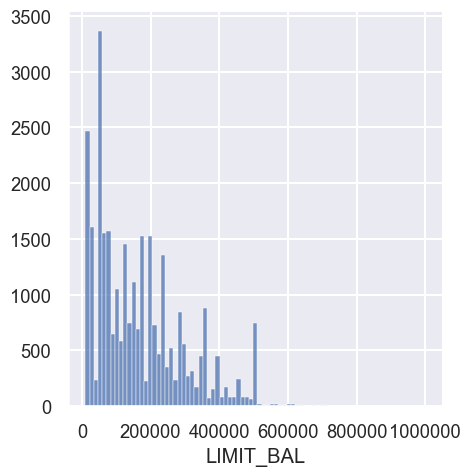

In [13]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)
plt.figure(figsize=(14,4))
sns.displot(df["LIMIT_BAL"])
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.show()

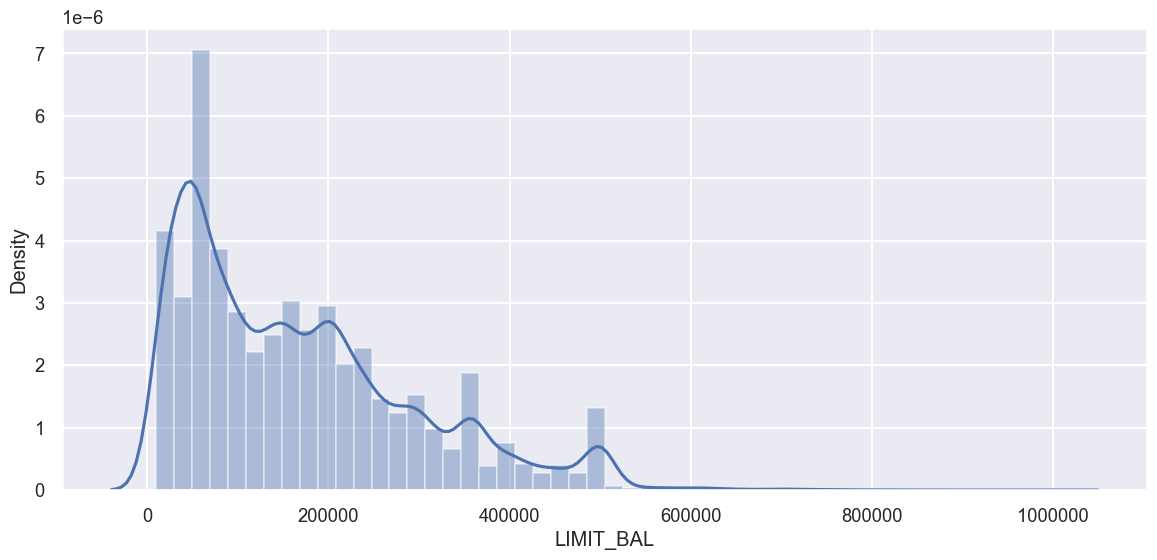

In [14]:
plt.figure(figsize=(14,6))
sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x') 
plt.show()

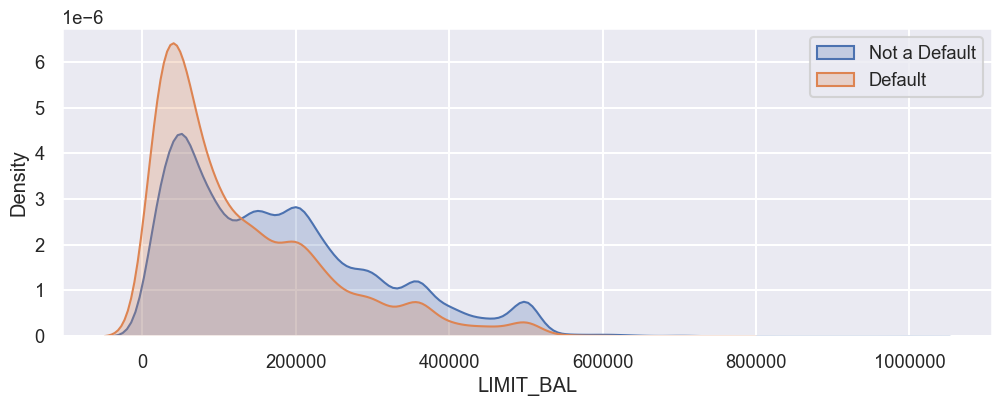

In [15]:
plt.figure(figsize=(12,4))
sns.kdeplot(df.loc[(df['Default'] == 0),"LIMIT_BAL"],label="Not a Default" ,shade=True,)
sns.kdeplot(df.loc[(df['Default'] == 1),"LIMIT_BAL"],label="Default" ,shade=True)
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show()

<AxesSubplot:xlabel='LIMIT_BAL'>

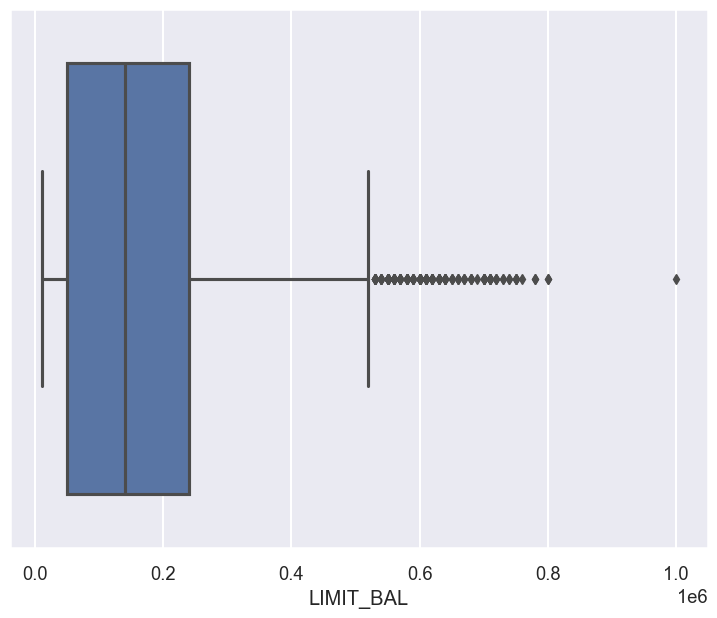

In [16]:
sns.boxplot(df["LIMIT_BAL"])

<AxesSubplot:>

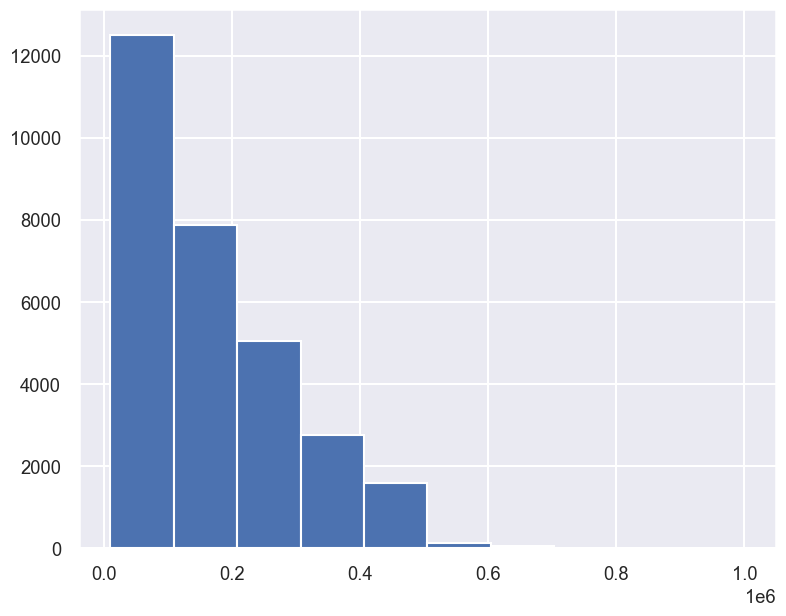

In [17]:
df["LIMIT_BAL"].hist()

In [18]:
print(df["LIMIT_BAL"].max())
print(df["LIMIT_BAL"].min())

1000000.0
10000.0


In [19]:
df["LimitBin"] = pd.cut(df['LIMIT_BAL'],bins=[10000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000])

In [20]:
df["LimitBin"].value_counts()

(10000, 100000]      12005
(100000, 200000]      7880
(200000, 300000]      5059
(300000, 400000]      2759
(400000, 500000]      1598
(500000, 600000]       127
(600000, 700000]        56
(700000, 800000]        22
(900000, 1000000]        1
(800000, 900000]         0
Name: LimitBin, dtype: int64

In [21]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0     -2  ...        0.0        0.0       0.0     689.0       0.0       0.0   
1      0  ...     3455.0     3261.0       0.0    1000.0    1000.0    1000.0   
2      0  ...    14948.0    15549.0    1518.0    1500.0    1000.0    1000.0   
3      0  ...    28959.0    29547.0    2000.0    2019.0    1200.0    1100.0   
4      0  ...    19146.0    19131.0    2000.0   36681.0   10000.0    9000.0   

   PAY_AMT5  PAY_AMT6  Default          LimitBin  
0       0.0       0.0        1   (10000, 100000]  
1       0.0    2000.0        1  (100000, 200000]  
2    1000.0    5000.0        0   (10000, 100000]  
3    1069.0    1000.0        0   (10000, 100000]  
4     689.0     679.0        0   (10000, 100000]  

[5 rows x 25 columns]

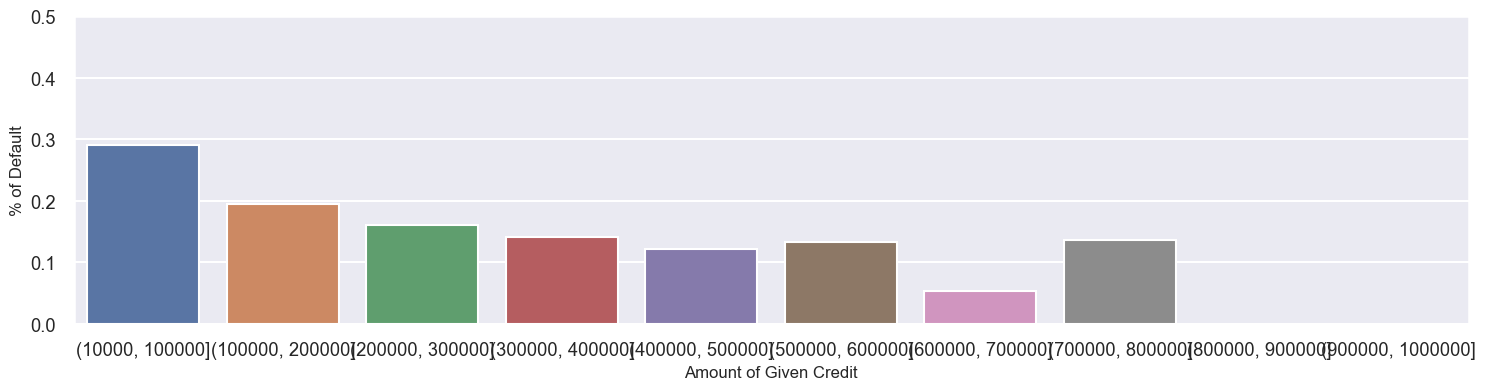

In [22]:
plt.figure(figsize=(18,4))
sns.barplot(x=df["LimitBin"],y=df["Default"], ci = None)
plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.show()

30% of peoples are deafult whos limit is below 1lack.

### SEX

In [23]:
#SEX: Gender (1=male, 2=female)
df["SEX"].value_counts(normalize=True)

2    0.603733
1    0.396267
Name: SEX, dtype: float64

In [24]:
df["Default"].groupby(df["SEX"]).value_counts(normalize=True)

SEX  Default
1    0          0.758328
     1          0.241672
2    0          0.792237
     1          0.207763
Name: Default, dtype: float64

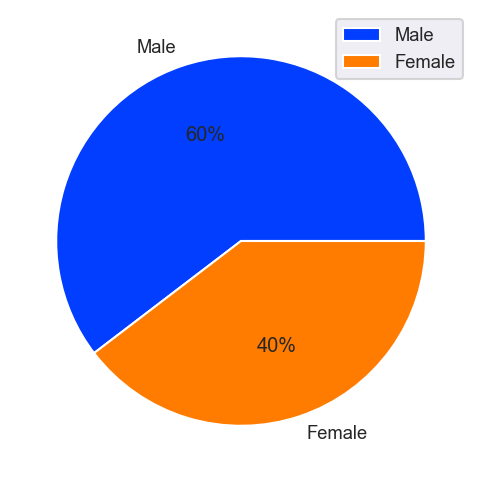

In [25]:
plt.figure(figsize = (15,6))
palette_color = sns.color_palette('bright')
keys=['Male','Female']
plt.pie(df["SEX"].value_counts(), labels=keys, colors=palette_color, autopct='%.0f%%')
plt.legend()
plt.show()

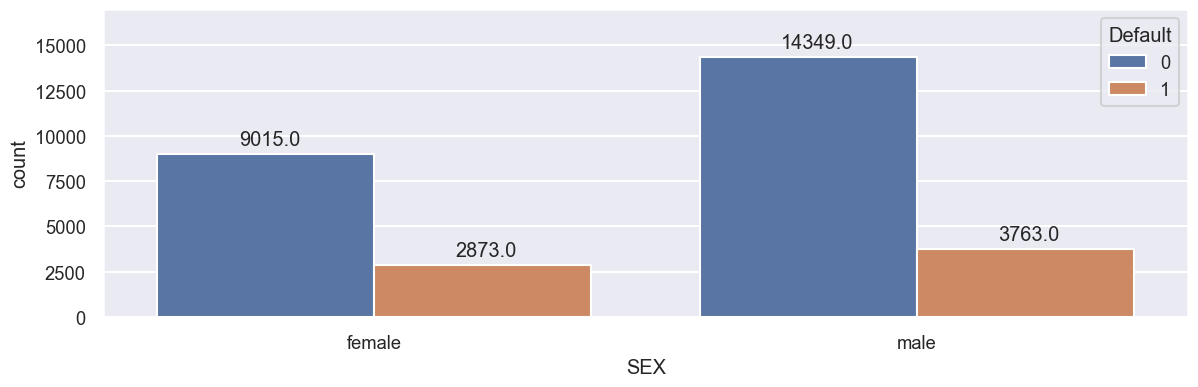

In [26]:
plt.figure(figsize=(14,4))
ax = sns.countplot("SEX",data=df,hue="Default")
plt.xticks(ticks=[1,0],labels=["male","female"])
plt.ylim(0,17000)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+500))

plt.show()


* By seeing above we can say clearly males are more in count who take credit card and also
* males more defaultrs then females.

### EDUCATION

In [27]:
#(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

* As per my online investigation i found these (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) features of education.
* But i can see 5 is unknown and 6 also unknown so i will make one unknow as 5 
* and also i can see in dataset having 0 category. as we dont know that iam also making 0 to 5

In [28]:
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,5)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,5)

In [29]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [30]:
df["Default"].groupby(df["EDUCATION"]).value_counts()

EDUCATION  Default
1          0           8549
           1           2036
2          0          10700
           1           3330
3          0           3680
           1           1237
4          0            116
           1              7
5          0            319
           1             26
Name: Default, dtype: int64

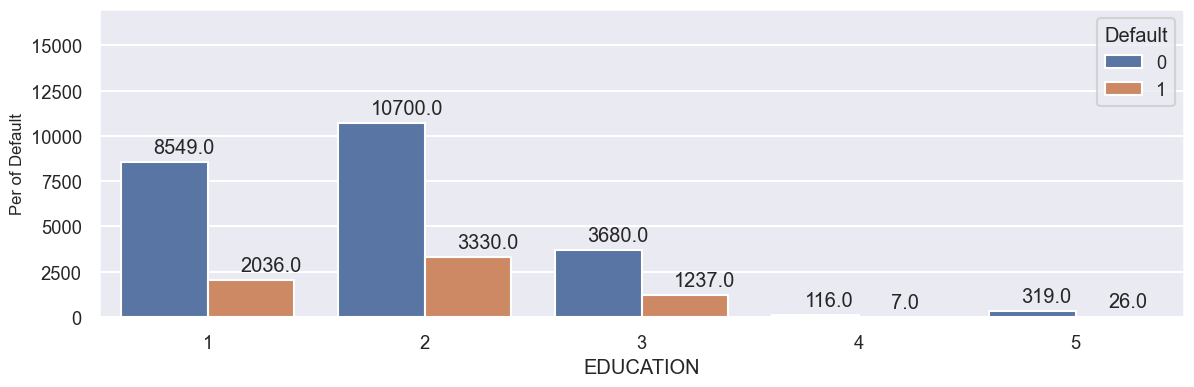

In [31]:
plt.figure(figsize=(14,4))
ax = sns.countplot("EDUCATION",data=df,hue="Default")
plt.ylabel("Per of Default", fontsize= 12)
plt.ylim(0,17000)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+500))

plt.show()

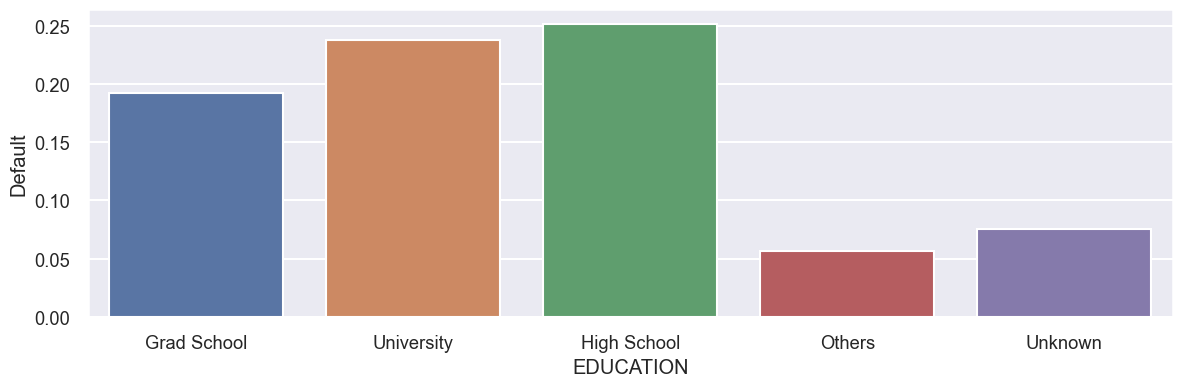

In [32]:
plt.figure(figsize=(14,4))
ax = sns.barplot(x="EDUCATION",y="Default",data=df,ci=False)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'])
plt.show()

### MARITAL STATUS

In [33]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [34]:
df['Default'].groupby(df['MARRIAGE']).value_counts(normalize = True)

MARRIAGE  Default
0         0          0.907407
          1          0.092593
1         0          0.765283
          1          0.234717
2         0          0.790717
          1          0.209283
3         0          0.739938
          1          0.260062
Name: Default, dtype: float64

In [35]:
#we are considering only 3 categories like single, marrige and other
df.loc[:,'MARRIAGE'] = df.loc[:,'MARRIAGE'].replace(0,3)

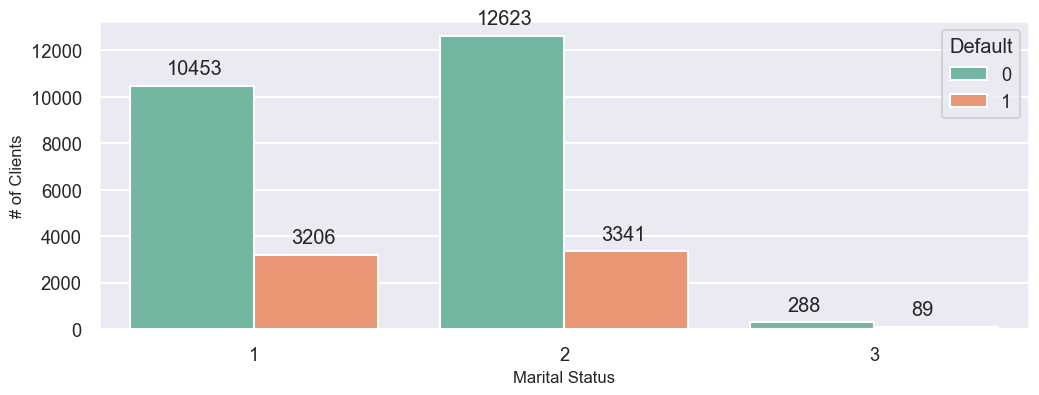

In [36]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'MARRIAGE', hue="Default", palette = 'Set2')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

In [37]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

* Credit card taking mostly "married" and "Single" people.
* and also "Singles" are little bit more defaults then "Married" people.

### Age :

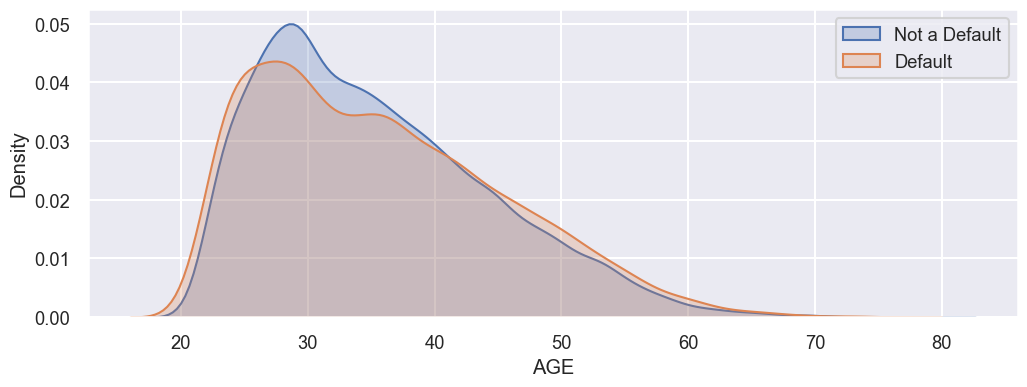

In [38]:
plt.figure(figsize=(12,4))
sns.kdeplot(df.loc[(df['Default'] == 0),"AGE"],label="Not a Default" ,shade=True,)
sns.kdeplot(df.loc[(df['Default'] == 1),"AGE"],label="Default" ,shade=True)
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show()

In [39]:
df['AgeBin'] = pd.cut(df['AGE'],[15, 20,25, 30, 35, 40, 50, 60, 80])
print(df['AgeBin'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
(15, 20]       0
Name: AgeBin, dtype: int64


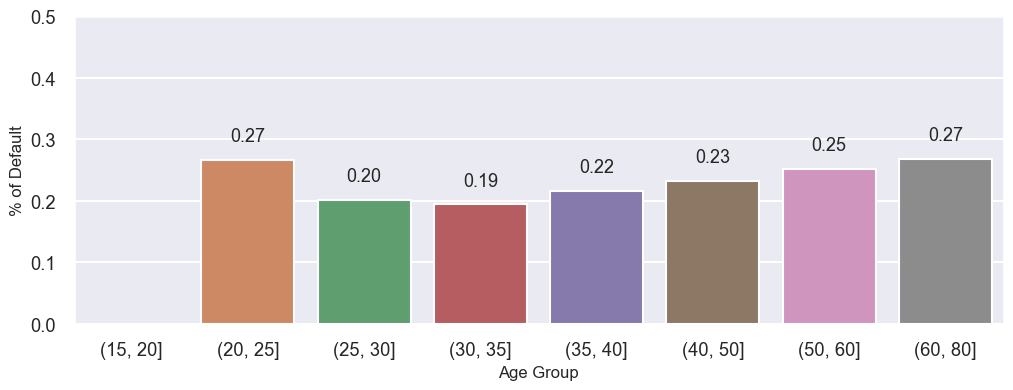

In [40]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "AgeBin", y = "Default", data = df , ci = None)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

* Lowest defaults age is between 25-35
* Highest defaults age is between 20-25 and 60+

In [41]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default',
       'LimitBin', 'AgeBin'],
      dtype='object')

## Repayment status

In [42]:
df["PAY_1"].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

-2 = no credit to pay,-1=pay duly, 0=minimum payment is met,1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above

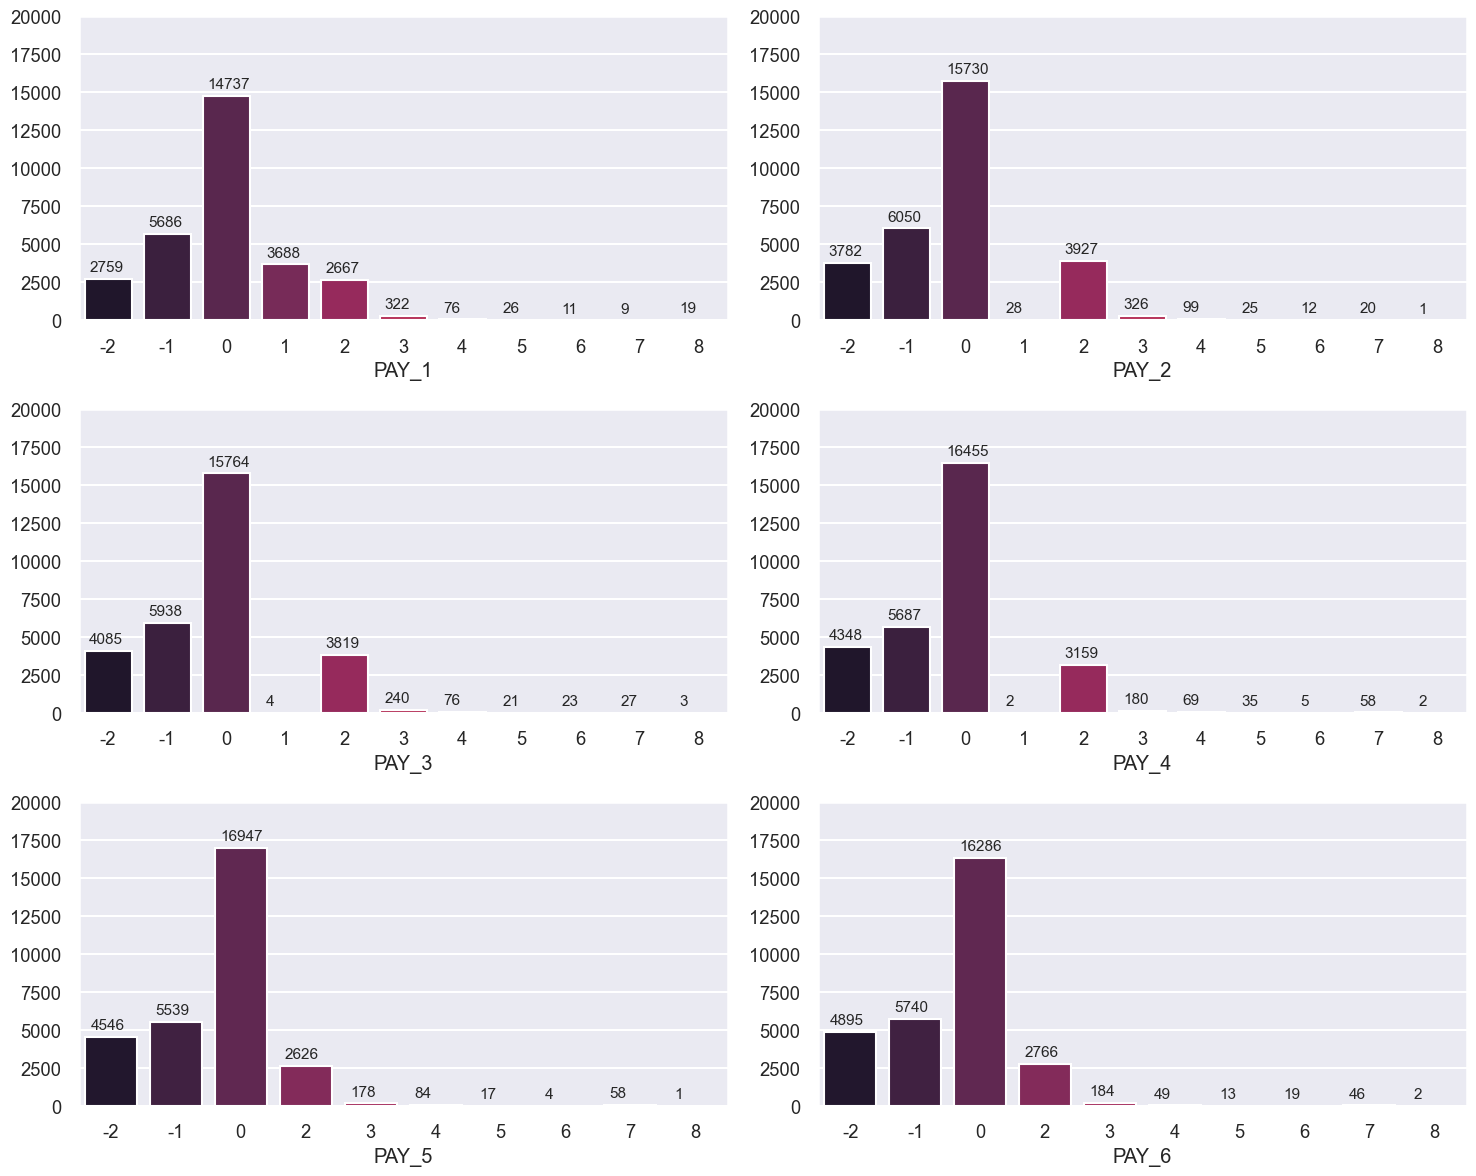

In [43]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col], palette = 'rocket')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

plt.show()

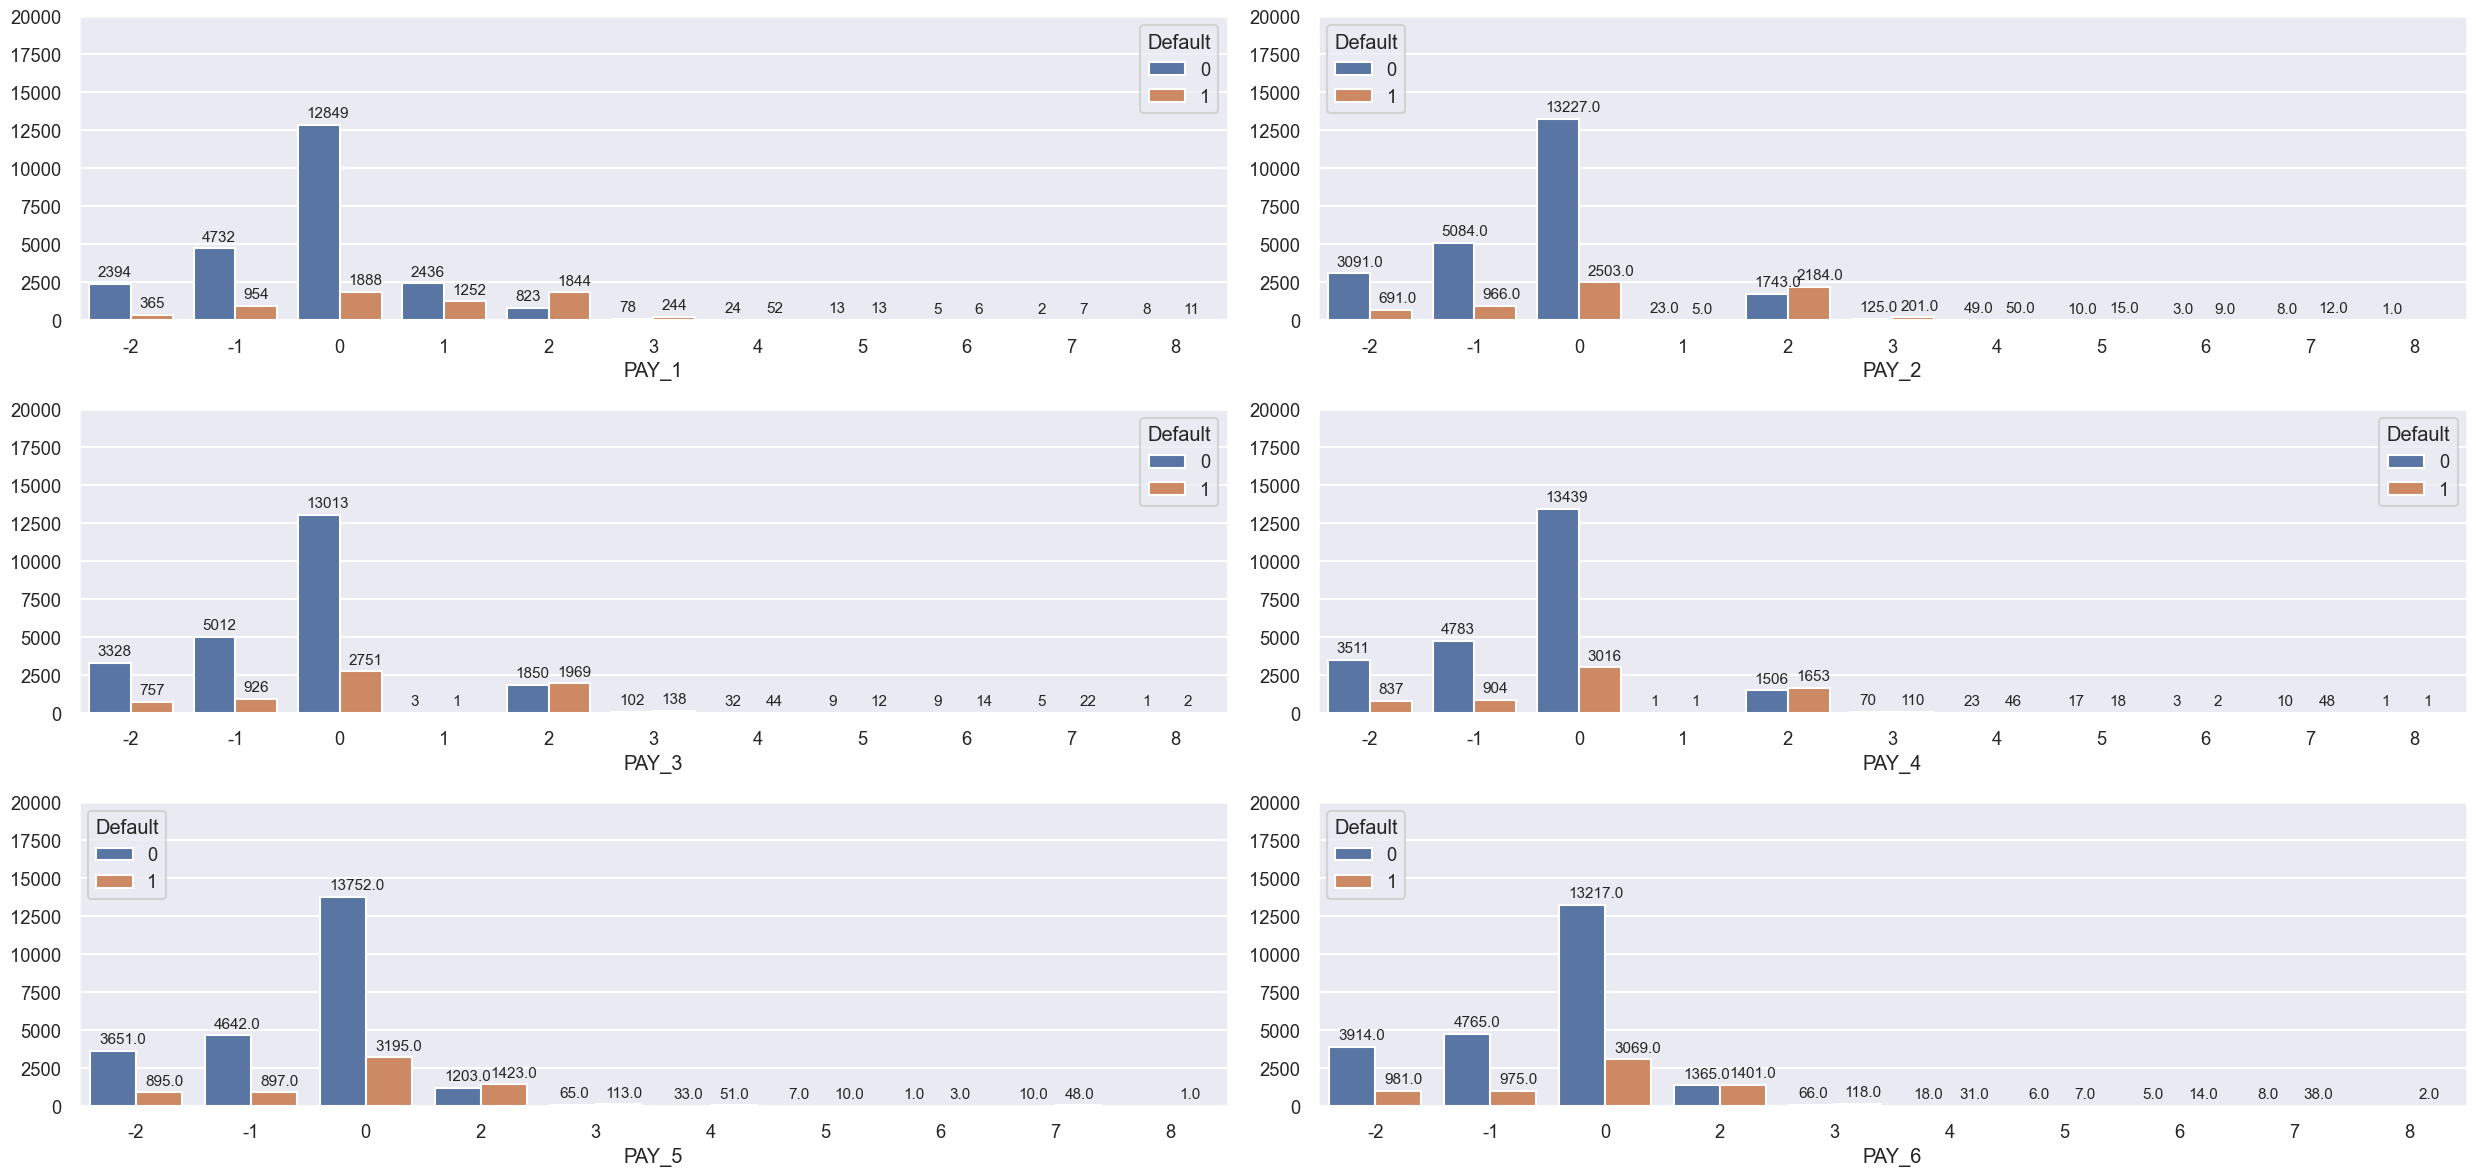

In [44]:
sns.set(rc={'figure.figsize':(16,7)})
sns.set_context("talk", font_scale=0.8)
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(25,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col],hue=df["Default"])
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

plt.show()

* Most people who are paying there min due,paid in full and no consumption they have less chance to be a default.
* People who are paying bills after 2 months has high defalut rate then default.

# Amount of bill statement
From  April to September

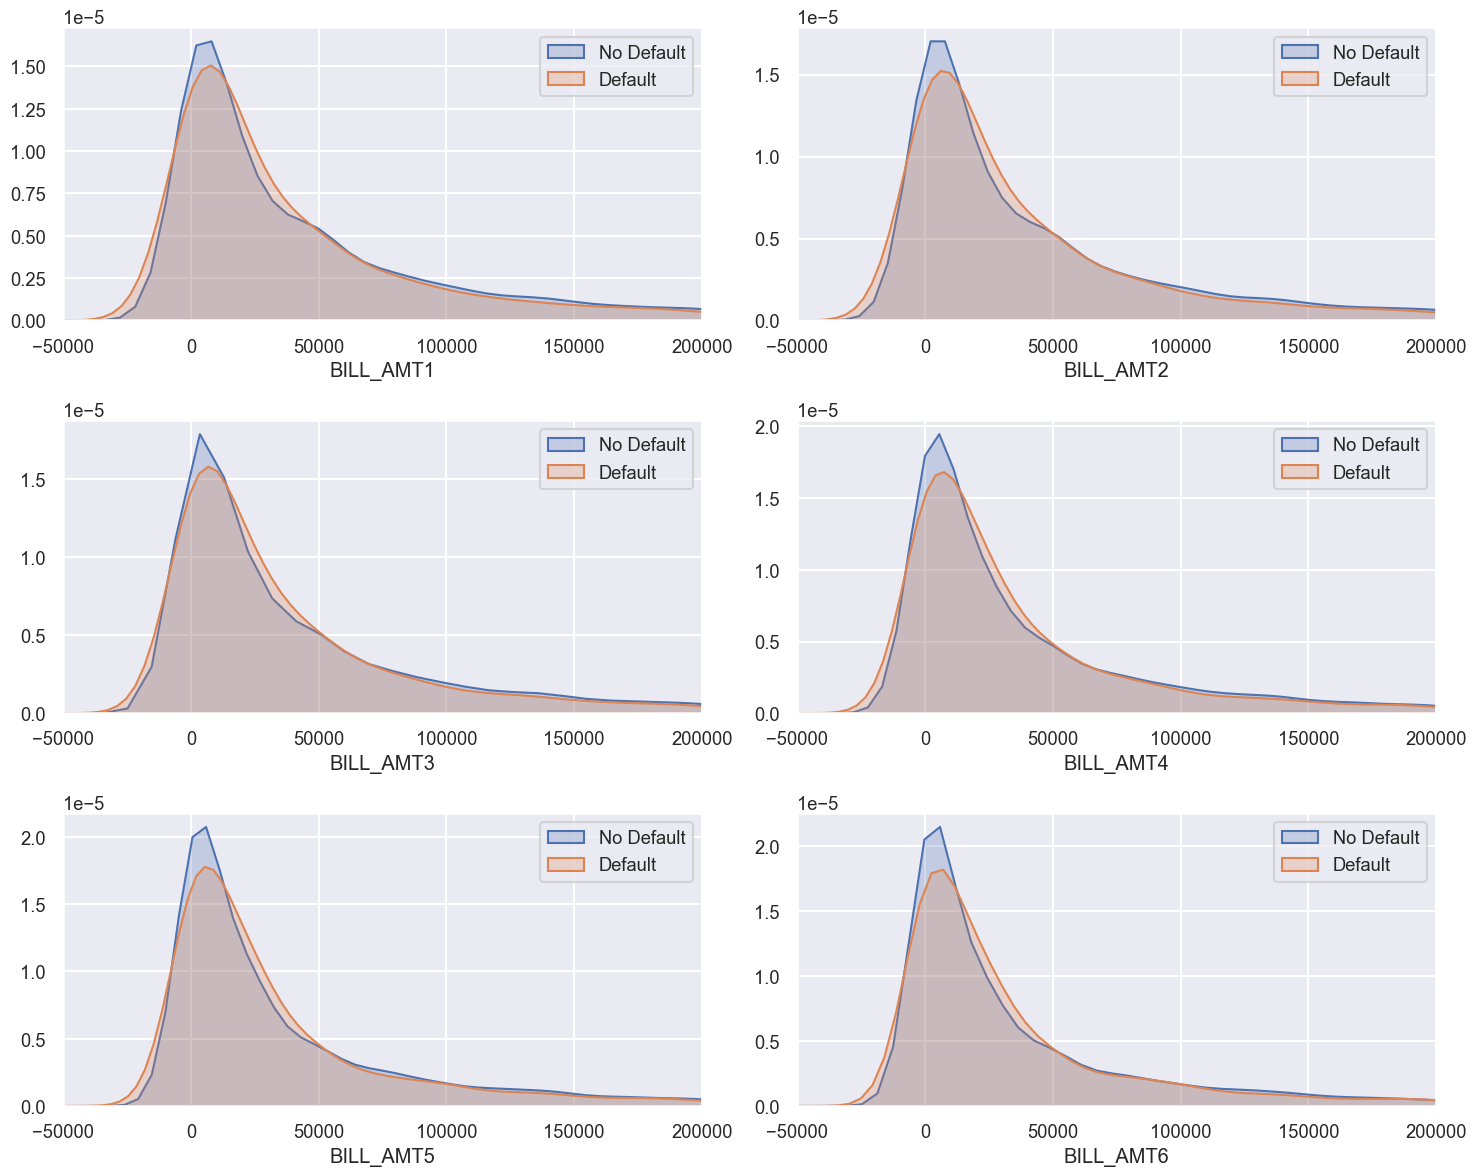

In [45]:
bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['Default'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['Default'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

## Amount of Previous Payment

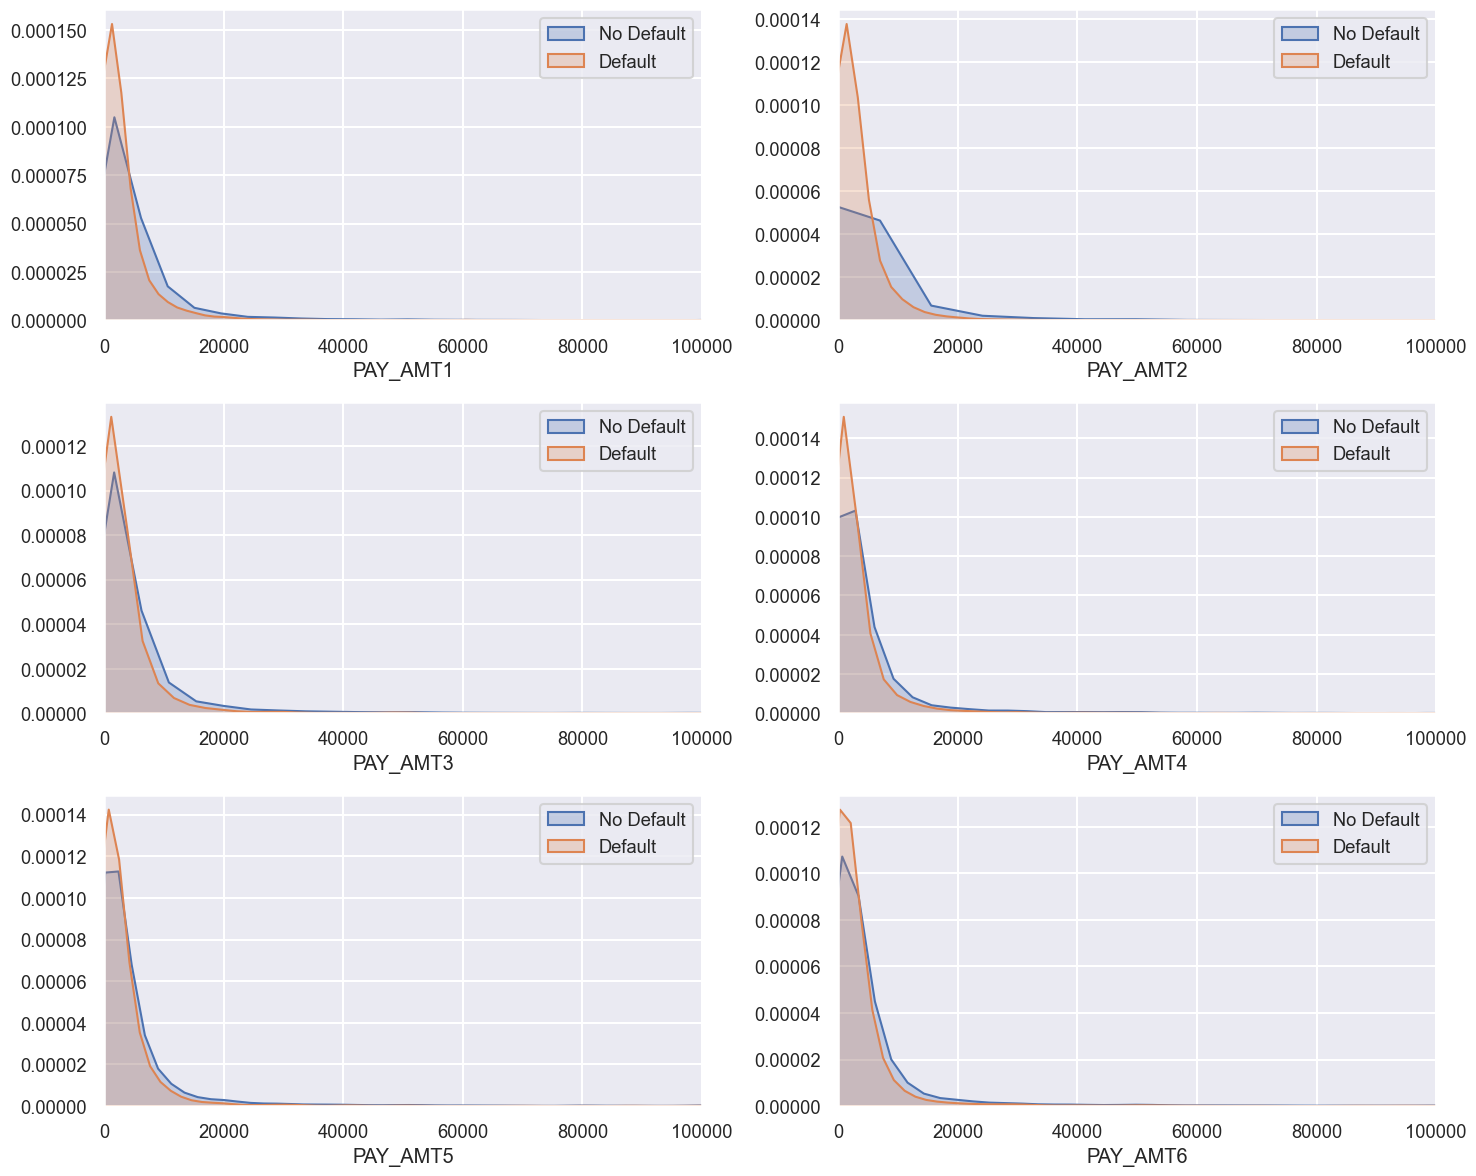

In [46]:
pay_amtx_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['Default'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['Default'] == 1), col], label = 'Default', shade = True)
    plt.xlim(0,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

### Imblanced data 

In [47]:
#Default payment (1=yes, 0=no)
df["Default"].value_counts()

0    23364
1     6636
Name: Default, dtype: int64

<AxesSubplot:xlabel='Default', ylabel='count'>

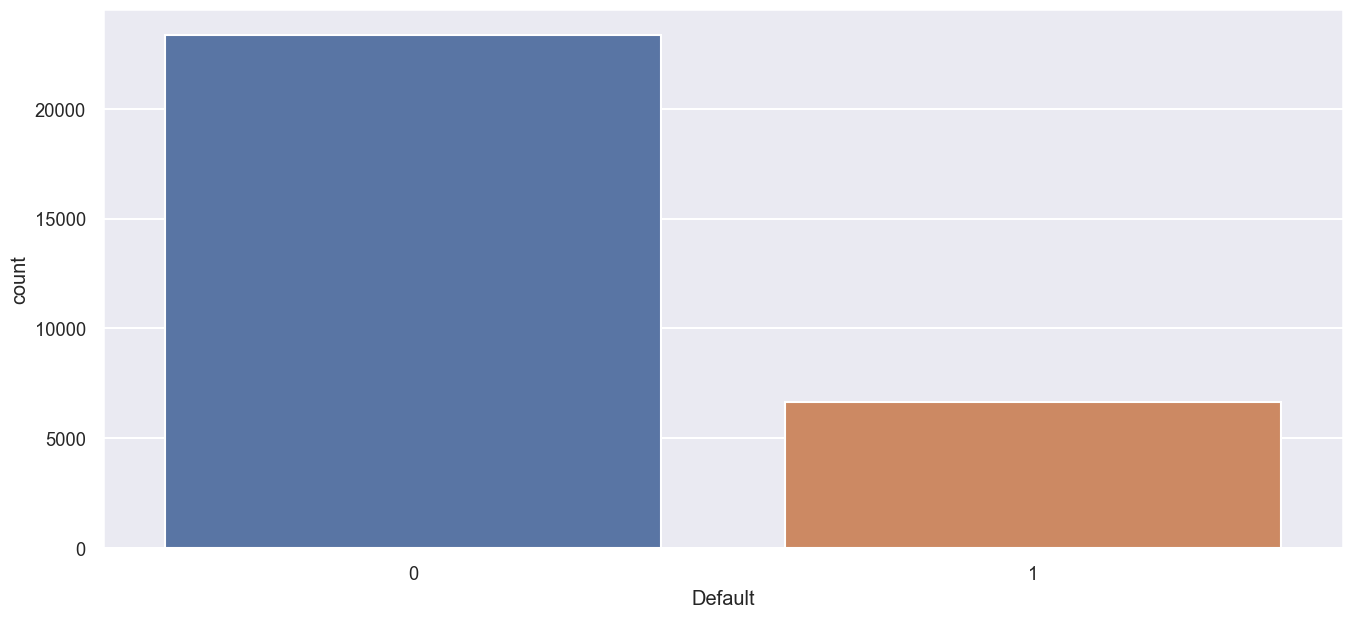

In [48]:
sns.countplot("Default",data=df)

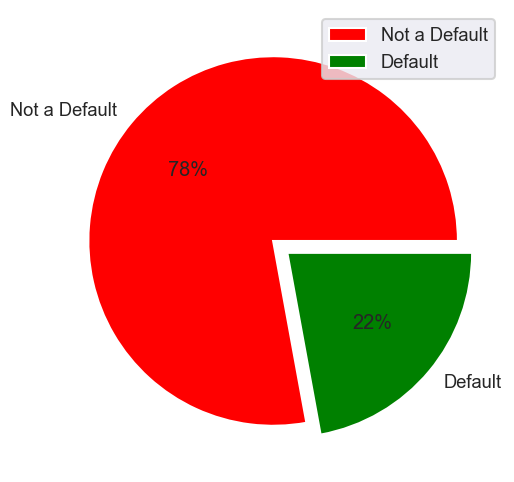

In [49]:
plt.figure(figsize = (15,6))
palette_color = sns.color_palette('bright')
keys=['Not a Default','Default']
plt.pie(df["Default"].value_counts(), labels=keys, autopct='%.0f%%',colors = ["red", "green"],explode = [0,0.1])
plt.legend()
plt.show()

In [50]:
#function to find % of each category in targeet column 
def per_target(data,target):
    total = data.shape[0]
    per_value = total/100 
    for i,j in zip(df[target].unique(),df[target].value_counts()):
        print("Percentage of "+str(i)+" is " + str(j/per_value)) 
per_target(df,"Default")

Percentage of 1 is 77.88
Percentage of 0 is 22.12


* As it a banking problem use case ,we generlly know that most credit card users are not a defaultres.
* Means in this type mostly usres try to pay there credit bills before due only.

### multicollinearity

In [51]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default',
       'LimitBin', 'AgeBin'],
      dtype='object')

In [52]:
df = df.drop(['LimitBin', 'AgeBin'],axis=1)

In [53]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

<Figure size 1500x600 with 0 Axes>

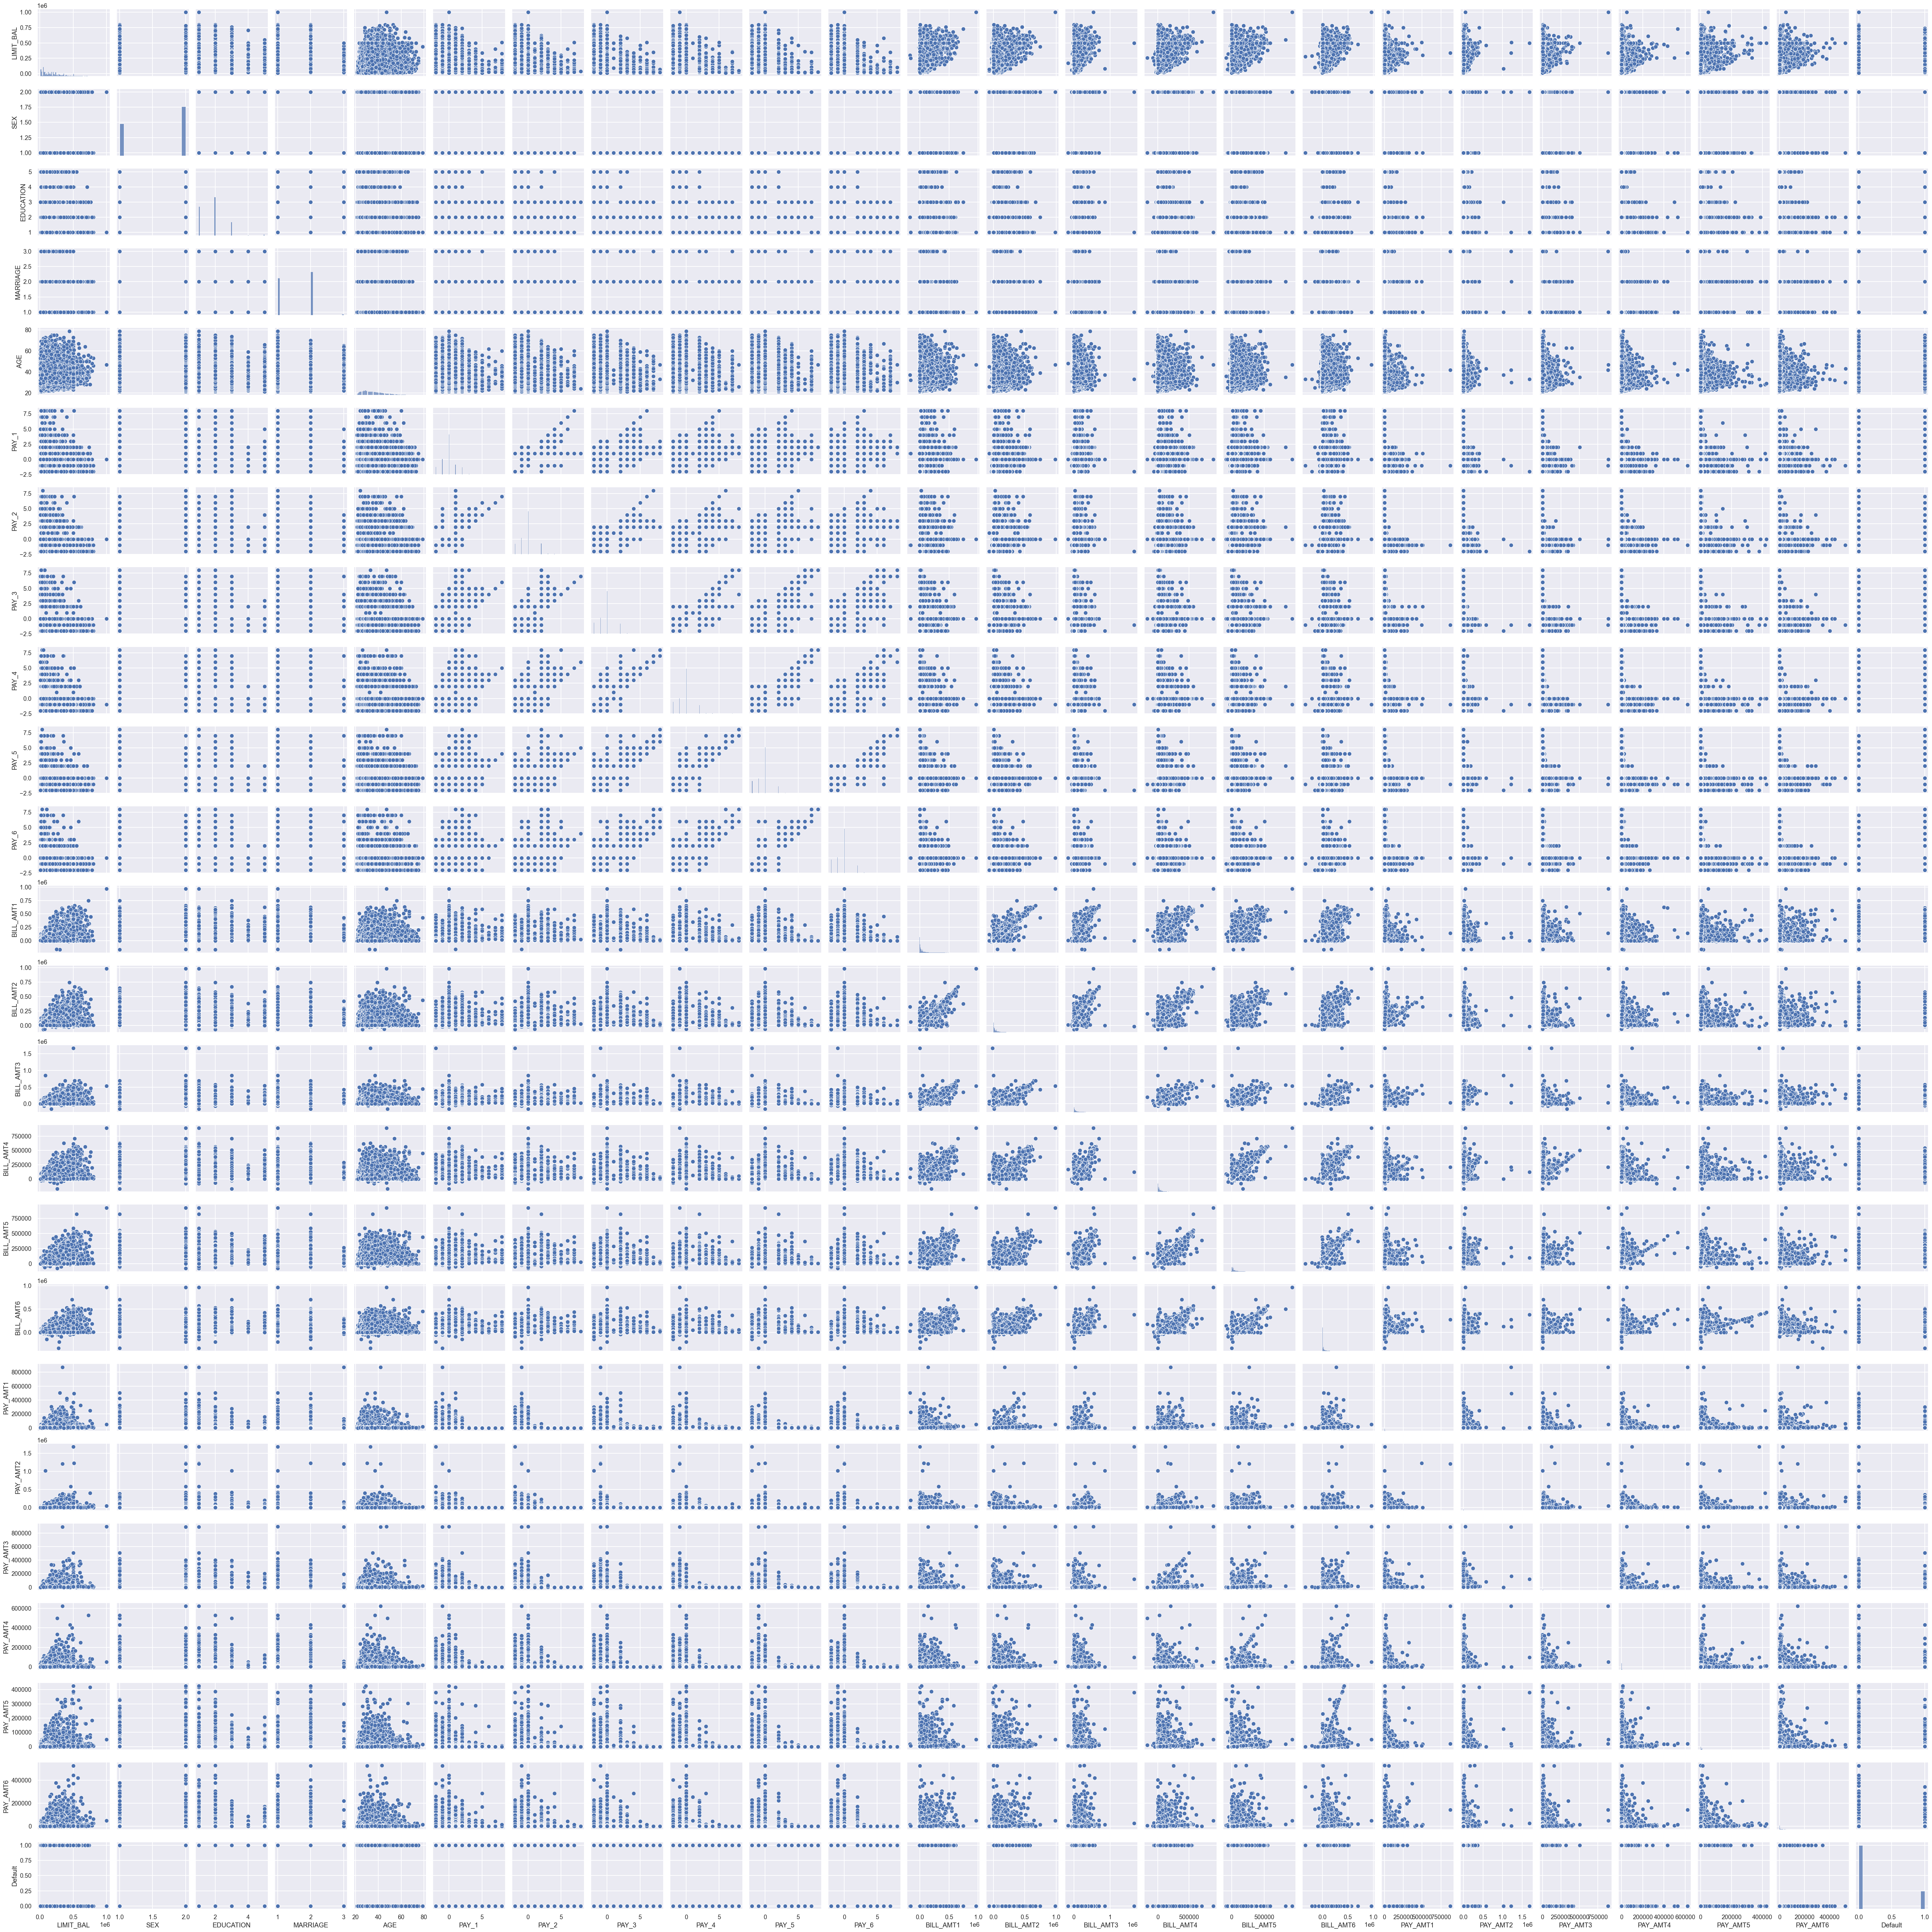

In [54]:
plt.figure(figsize = (15,6))
sns.pairplot(df)

<AxesSubplot:>

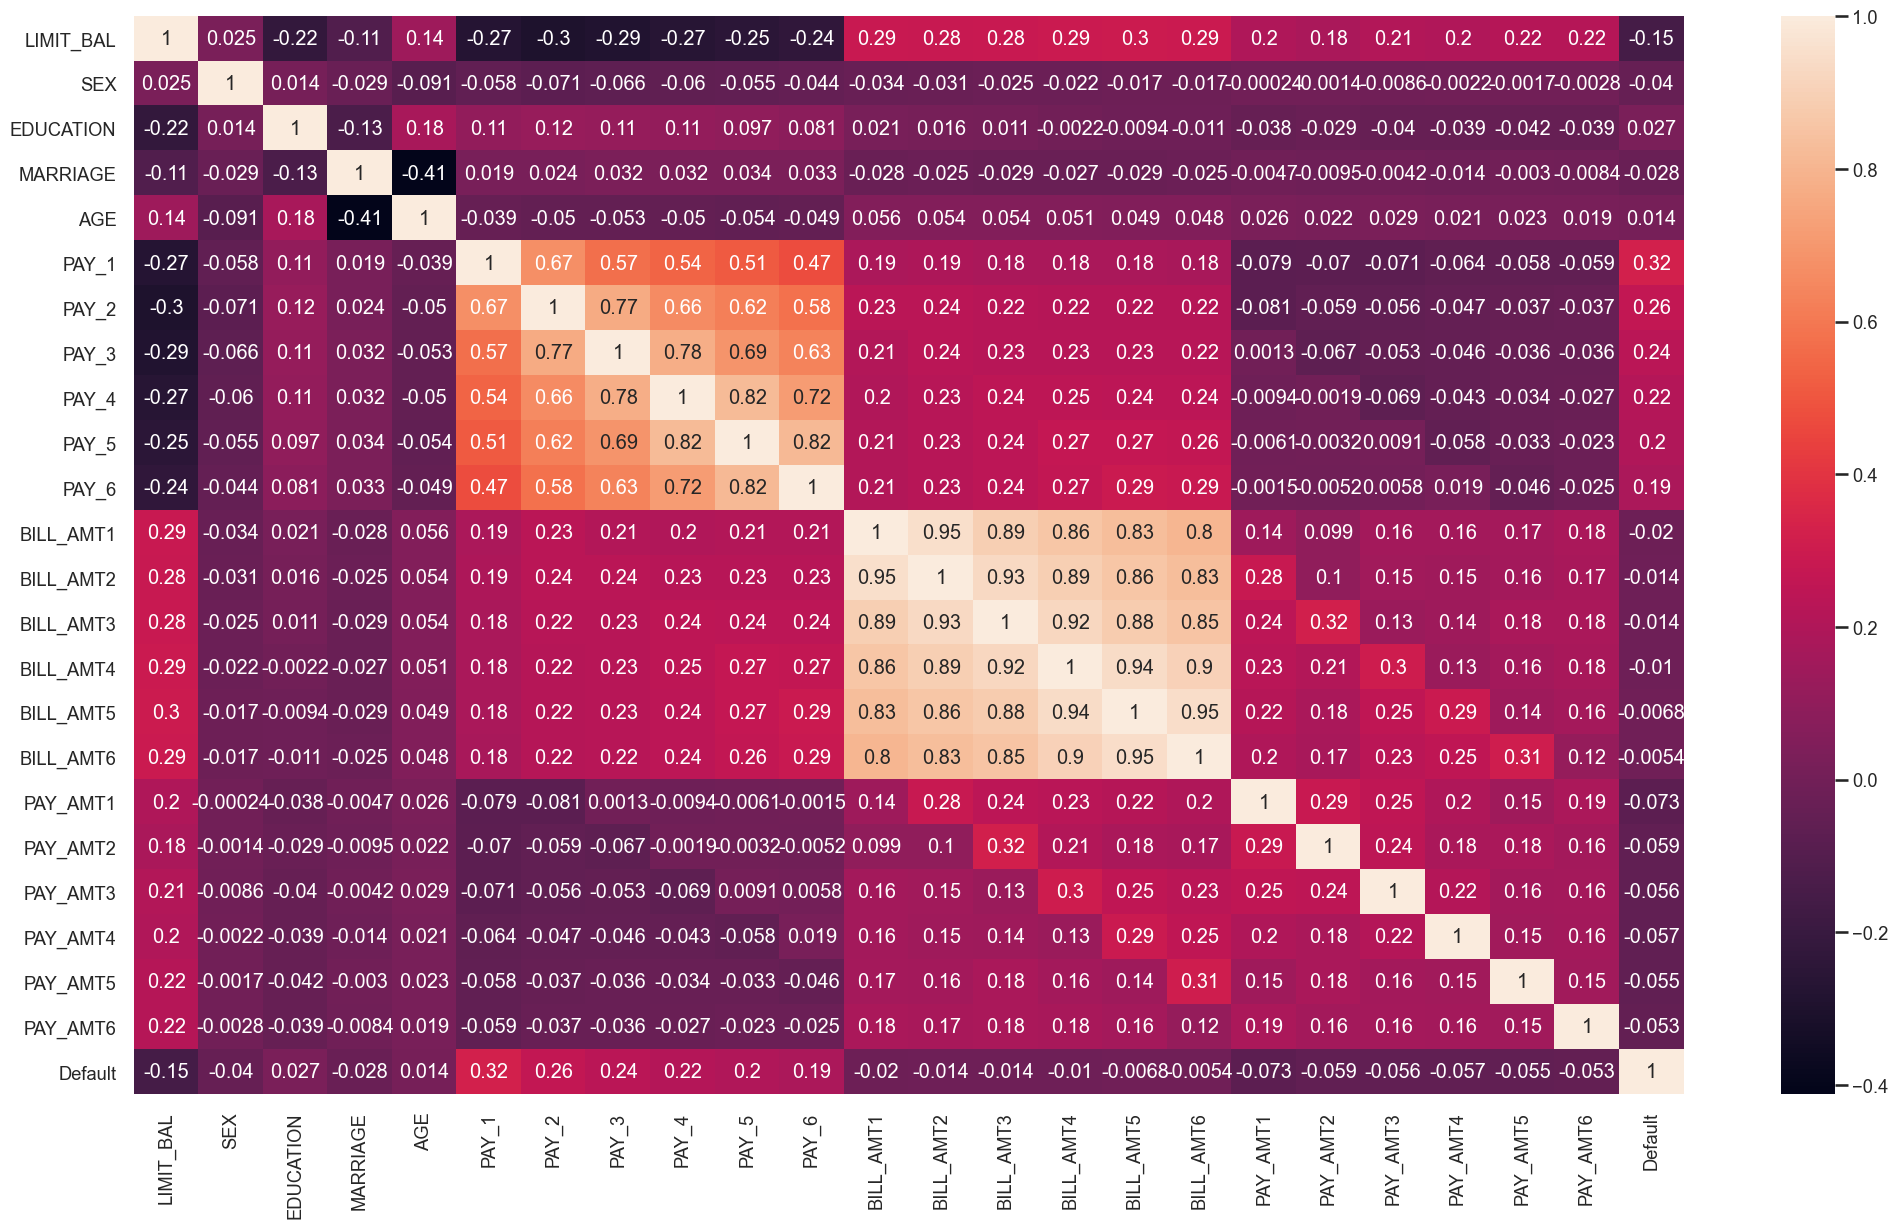

In [55]:
plt.figure(figsize=(25,14))
sns.heatmap(df.corr(), annot=True)

In [56]:
df.shape

(30000, 24)

* we can see that some correlation between independent in graph
* but when any customer who not paid thire bill in first cycle then they not able to pay for 2nd cycle also.
* so in this case we can igonre correlation between independent features.

In [57]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  Default  
0       0.0       0.0       0.0        1  
1    1000.0       0.0    2000.0        1  
2    1000.0    1000.0    5000.0        0  
3    1100.0    1069.0    1000.0        0  
4    9000.0     689.0     679.0        0  

[5 rows x 24 columns]

In [58]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [59]:
#Spliting data as independent and dependent variables
x=df.drop(labels=['Default'],axis=1)
y=df['Default']

In [60]:
x.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -2  ...      689.0        0.0        0.0        0.0       0.0     689.0   
1      0  ...     2682.0     3272.0     3455.0     3261.0       0.0    1000.0   
2      0  ...    13559.0    14331.0    14948.0    15549.0    1518.0    1500.0   
3      0  ...    49291.0    28314.0    28959.0    29547.0    2000.0    2019.0   
4      0  ...    35835.0    20940.0    19146.0    19131.0    2000.0   36681.0   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0       0.0       0.0       0.0       0.0  
1    1000.0    1000.0       0.0    2000.0  
2    1000.0    1000.0    1000.0    5000.0  
3    1200.0    1100.0    1069.0    1000.0  
4   10000.0    9000.0     689.0     679.0  

[5 rows x 23 columns]

In [61]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Default, dtype: int64

# Creating Models:

In [62]:
# Splitting data into Train and Cross-validation data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

## 1. Random Forest Model :

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,confusion_matrix

In [64]:
rfc = RandomForestClassifier()

In [65]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
rfc_pred = rfc.predict(X_test)

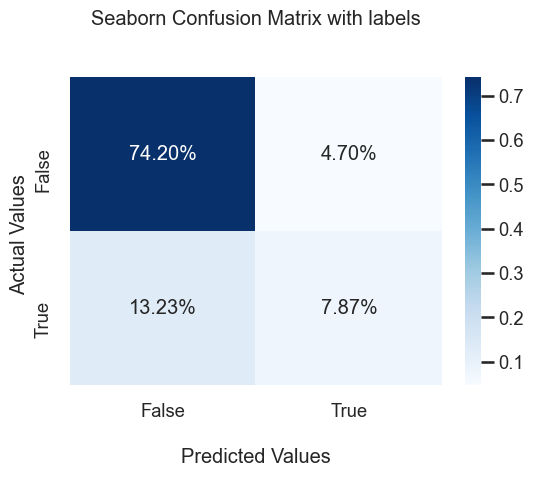

In [67]:
plt.figure(figsize=(6,4))
cf_matrix = confusion_matrix(y_test,rfc_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [68]:
print("Acccuracy:- ",accuracy_score(y_test,rfc_pred))
print("Precicion:- ",precision_score(y_test,rfc_pred))
print("Recall:- ",recall_score(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

Acccuracy:-  0.8206666666666667
Precicion:-  0.6259946949602122
Recall:-  0.37282780410742494
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4734
           1       0.63      0.37      0.47      1266

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



## Random Forest Model with hyper parameter tunning:

In [69]:
param_grid ={
    "max_features" : ['auto', 'sqrt'],
    "max_depth" : ([int(x) for x in np.linspace(10, 110, num = 11)]+[None]),
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4],
    "bootstrap" : [True, False],
    "oob_score":[True,False]
}

In [70]:
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5,  verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, oob_score=True;, score=0.819 total time=   5.4s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, oob_score=True;, score=0.814 total time=   5.7s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, oob_score=True;, score=0.816 total time=   6.6s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, oob_score=True;, score=0.820 total time=   6.6s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, oob_score=True;, score=0.822 total time=   6.6s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, oob_score=False;, score=0.819 total time=   4.9s
[CV 2/5] END bootstrap=True, 

[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, oob_score=True;, score=0.822 total time=   7.7s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, oob_score=False;, score=0.818 total time=   4.7s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, oob_score=False;, score=0.816 total time=   4.6s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, oob_score=False;, score=0.816 total time=   4.6s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, oob_score=False;, score=0.823 total time=   4.7s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, oob_score=False;, score=0.820 total time=   4.6s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, m

[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, oob_score=False;, score=0.821 total time=   8.2s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, oob_score=False;, score=0.823 total time=  10.9s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, oob_score=True;, score=0.817 total time=   6.5s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, oob_score=True;, score=0.817 total time=   9.4s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, oob_score=True;, score=0.815 total time=   5.4s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, oob_score=True;, score=0.821 total time=   7.7s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_sa

[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, oob_score=True;, score=0.817 total time=   5.1s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, oob_score=True;, score=0.823 total time=   5.4s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, oob_score=True;, score=0.822 total time=   7.4s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, oob_score=False;, score=0.818 total time=   4.7s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, oob_score=False;, score=0.817 total time=   7.6s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, oob_score=False;, score=0.816 total time=   7.3s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_sampl

[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, oob_score=False;, score=0.813 total time=   8.1s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, oob_score=False;, score=0.817 total time=   8.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, oob_score=False;, score=0.821 total time=  17.2s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, oob_score=False;, score=0.816 total time=  11.5s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, oob_score=True;, score=0.815 total time=  11.3s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, oob_score=True;, score=0.817 total time=  24.8s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samp

[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, oob_score=True;, score=0.819 total time=   9.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, oob_score=True;, score=0.810 total time=  12.1s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, oob_score=True;, score=0.815 total time=  13.6s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, oob_score=True;, score=0.819 total time=   8.2s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, oob_score=True;, score=0.817 total time=   8.4s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, oob_score=False;, score=0.815 total time=  11.5s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples

[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, oob_score=True;, score=0.820 total time=  16.8s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, oob_score=False;, score=0.818 total time=   7.9s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, oob_score=False;, score=0.814 total time=  13.2s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, oob_score=False;, score=0.815 total time=   9.3s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, oob_score=False;, score=0.822 total time=   7.3s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, oob_score=False;, score=0.820 total time=   7.2s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, m

[CV 4/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, oob_score=False;, score=0.818 total time=   8.8s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, oob_score=False;, score=0.812 total time=  12.3s
[CV 1/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, oob_score=True;, score=0.818 total time=  29.2s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, oob_score=True;, score=0.812 total time=  30.8s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, oob_score=True;, score=0.815 total time=  24.3s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, oob_score=True;, score=0.821 total time=  25.4s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_sa

[CV 3/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, oob_score=True;, score=0.815 total time=  19.0s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, oob_score=True;, score=0.818 total time=  12.5s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, oob_score=True;, score=0.817 total time=  37.7s
[CV 1/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, oob_score=False;, score=0.820 total time=   9.4s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, oob_score=False;, score=0.816 total time=   8.6s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, oob_score=False;, score=0.814 total time=  20.3s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_sampl

[CV 2/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, oob_score=False;, score=0.811 total time=  10.5s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, oob_score=False;, score=0.811 total time=  11.8s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, oob_score=False;, score=0.817 total time=  25.6s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, oob_score=False;, score=0.819 total time=  23.9s
[CV 1/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, oob_score=True;, score=0.819 total time=  23.5s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, oob_score=True;, score=0.816 total time=  22.0s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samp

[CV 1/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, oob_score=True;, score=0.814 total time=  23.8s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, oob_score=True;, score=0.811 total time=  16.0s


In [ ]:
grid.best_estimator_

In [ ]:
rfc_hyper = RandomForestClassifier(oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10)

In [ ]:
rfc_hyper.fit(X_train,y_train)

In [ ]:
rfc_hyper_predict = rfc_hyper.predict(X_test)

In [ ]:
plt.figure(figsize=(6,4))
cf_matrix = confusion_matrix(y_test,rfc_hyper_predict)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print("Acccuracy:- ",accuracy_score(y_test,rfc_hyper_predict))
print("Precicion:- ",precision_score(y_test,rfc_hyper_predict))
print("Recall:- ",recall_score(y_test,rfc_hyper_predict))
print(classification_report(y_test,rfc_hyper_predict))

## 2. XGBoost :

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbc = XGBClassifier(objective = 'binary:logistic')

In [ ]:
xgbc.fit(X_train,y_train)

In [ ]:
xgb_pred = xgbc.predict(X_test)

In [ ]:
plt.figure(figsize=(6,4))
cf_matrix = confusion_matrix(y_test,xgb_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print("Acccuracy:- ",accuracy_score(y_test,xgb_pred))
print("Precicion:- ",precision_score(y_test,xgb_pred))
print("Recall:-    ",recall_score(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

## Lets try creating model by scalling data :

In [ ]:
#tried with scaled data 
from sklearn.preprocessing import StandardScaler
train_scaler=StandardScaler()
test_scaler=StandardScaler()
scaled_train_data=train_scaler.fit_transform(X_train)
scaled_test_data=test_scaler.fit_transform(X_test)
scaled_train_df=pd.DataFrame(data=scaled_train_data, columns=X_train.columns, index=X_train.index)
scaled_test_df=pd.DataFrame(data=scaled_test_data, columns=X_test.columns, index=X_test.index)
scaled_train_df.head()

In [ ]:
scaled_test_df.head()

## 3. Navie bayes :

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [ ]:
gnb.fit(scaled_train_df,y_train)

In [ ]:
gnb_pred=gnb.predict(X_test)

In [ ]:
plt.figure(figsize=(6,4))
cf_matrix = confusion_matrix(y_test,gnb_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print("Acccuracy:- ",accuracy_score(y_test,gnb_pred))
print("Precicion:- ",precision_score(y_test,gnb_pred))
print("Recall:-    ",recall_score(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))

In [ ]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
#Creating an object of the Grid Search class
grid = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5,  verbose=3)

In [ ]:
#finding the best parameters
grid.fit(scaled_train_data, y_train)

In [ ]:
grid.best_estimator_

In [ ]:
gnb_hyper=GaussianNB(var_smoothing=0.5)

In [ ]:
gnb_hyper.fit(X_train,y_train)

In [ ]:
gnb_hyper_pred = gnb_hyper.predict(X_test)

In [ ]:
plt.figure(figsize=(6,4))
cf_matrix = confusion_matrix(y_test,gnb_hyper_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print("Acccuracy:- ",accuracy_score(y_test,gnb_hyper_pred))
print("Precicion:- ",precision_score(y_test,gnb_hyper_pred))
print("Recall:-    ",recall_score(y_test,gnb_hyper_pred))
print(classification_report(y_test,gnb_hyper_pred))

# 4. Logistic regression :

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr_pred = lr.predict(X_test)

In [ ]:
plt.figure(figsize=(6,4))
cf_matrix = confusion_matrix(y_test,lr_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print("Acccuracy:- ",accuracy_score(y_test,lr_pred))
print("Precicion:- ",precision_score(y_test,lr_pred))
print("Recall:-    ",recall_score(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

## Saving model :

In [ ]:
#saving random forest cls with hyper paramter tunning model 
import pickle
pickle.dump(rfc_hyper,open("SingleValueModels/rfc.pkl","wb"))

#### model.pkl prediction sample:

In [ ]:
#taken sample data 
sample_data = [20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0]

In [ ]:
#loding model 
model = pickle.load(open("SingleValueModels/rfc.pkl","rb"))

In [ ]:
model.predict([sample_data])[0]

In [ ]:
pickle.dump(rfc,open("SingleValueModels/hyper_rfc.pkl","wb"))

In [ ]:
model = pickle.load(open("SingleValueModels/hyper_rfc.pkl","rb"))

In [ ]:
model.predict([sample_data])[0]

In [ ]:
pickle.dump(xgbc,open("SingleValueModels/xgbc.pkl","wb"))

In [ ]:
model = pickle.load(open("SingleValueModels/xgbc.pkl","rb"))